In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from matplotlib.ticker import MaxNLocator

# EXCEL 불러오기

In [2]:
ifood_df= pd.read_csv("../ifood_df.csv", encoding="cp949")
ifood_df

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,0,1,46,709,43,182,42,118,247,...,0,0,0,0,1,0,0,1094,847,0
2201,64014.0,2,1,56,406,0,30,0,0,8,...,1,0,0,0,0,0,1,436,428,1
2202,56981.0,0,0,91,908,48,217,32,12,24,...,0,0,0,0,1,0,0,1217,1193,1
2203,69245.0,0,1,8,428,30,214,80,30,61,...,1,0,0,0,0,1,0,782,721,0


In [4]:
ml_project1_data= pd.read_csv("../ml_project1_data.csv", encoding="cp949")
ml_project1_data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [5]:
ml_project1_data[['Recency', 'MntMeatProducts', 'MntGoldProds']]

,Recency,MntMeatProducts,MntGoldProds
0,58,546,88
1,38,6,6
2,26,127,42
3,26,20,5
4,94,118,15
...,...,...,...
2235,46,182,247
2236,56,30,8
2237,91,217,24
2238,8,214,61


# 범주화 및 시각화

Text(0.5, 0, 'Sepal length')

Text(0, 0.5, 'Sepal width')

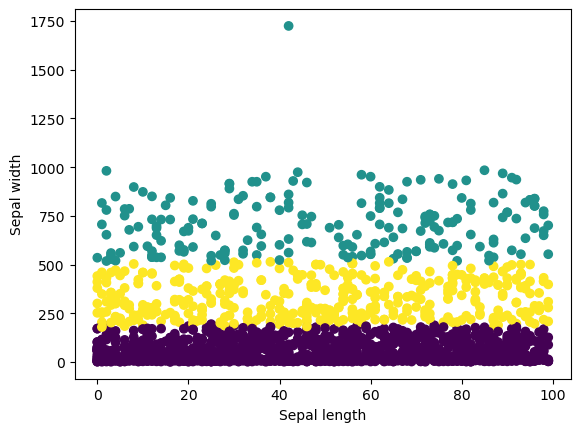

In [7]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# 데이터 로드
iris = pd.read_csv('../ifood_df.csv')

# 데이터 전처리
X = iris[['Recency', 'MntMeatProducts', 'MntGoldProds']]

# 범주화
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
labels = kmeans.labels_

# 시각화
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

<AxesSubplot:xlabel='Recency', ylabel='Count'>

56    37
30    32
54    32
46    31
92    30
      ..
41    15
59    14
22    13
7     12
44    11
Name: Recency, Length: 100, dtype: int64

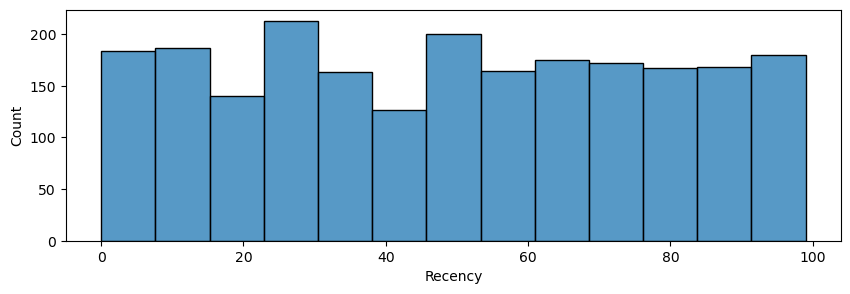

In [8]:
fig=plt.figure(figsize=(10,3), dpi=100)
ax1=fig.subplots(1,1)

Recency=ml_project1_data['Recency']

sns.histplot(data=Recency, ax=ax1)

Recency.value_counts()

<AxesSubplot:xlabel='MntMeatProducts', ylabel='Count'>

7      53
5      50
11     49
8      46
6      43
       ..
116     1
569     1
685     1
354     1
182     1
Name: MntMeatProducts, Length: 558, dtype: int64

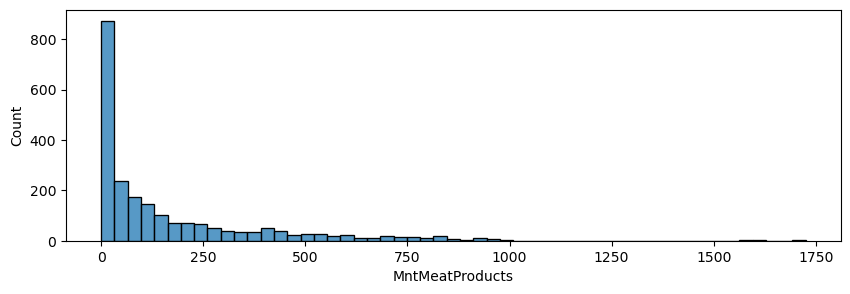

In [9]:
fig=plt.figure(figsize=(10,3), dpi=100)
ax1=fig.subplots(1,1)

MntMeatProducts=ml_project1_data['MntMeatProducts']

sns.histplot(data=MntMeatProducts, ax=ax1)

MntMeatProducts.value_counts()

<AxesSubplot:xlabel='MntGoldProds', ylabel='Count'>

1      73
4      70
3      69
5      63
12     63
       ..
178     1
169     1
132     1
262     1
247     1
Name: MntGoldProds, Length: 213, dtype: int64

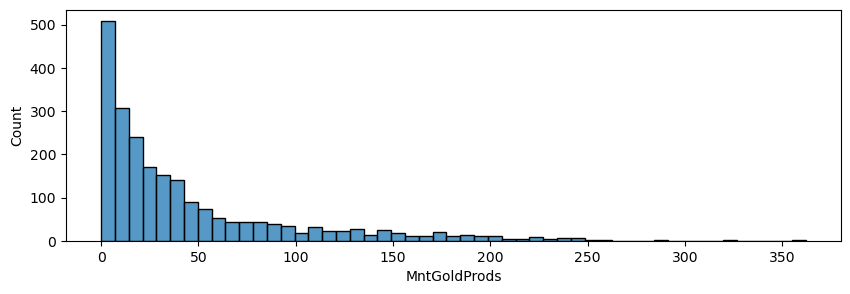

In [10]:
fig=plt.figure(figsize=(10,3), dpi=100)
ax1=fig.subplots(1,1)

MntGoldProds=ml_project1_data['MntGoldProds']

sns.histplot(data=MntGoldProds, ax=ax1)

MntGoldProds.value_counts()

Text(0.5, 0, 'Recency')

Text(0.5, 0.5, 'MntMeatProducts')

Text(0.5, 0, 'MntGoldProds')

<BarContainer object of 5 artists>

Text(0.5, 1.0, 'Recency')

<BarContainer object of 10 artists>

Text(0.5, 1.0, 'MntMeatProducts')

<BarContainer object of 10 artists>

Text(0.5, 1.0, 'MntGoldProds')

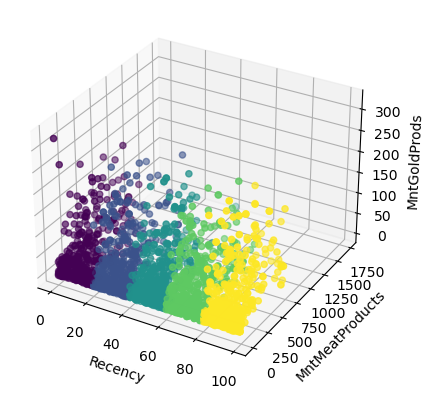

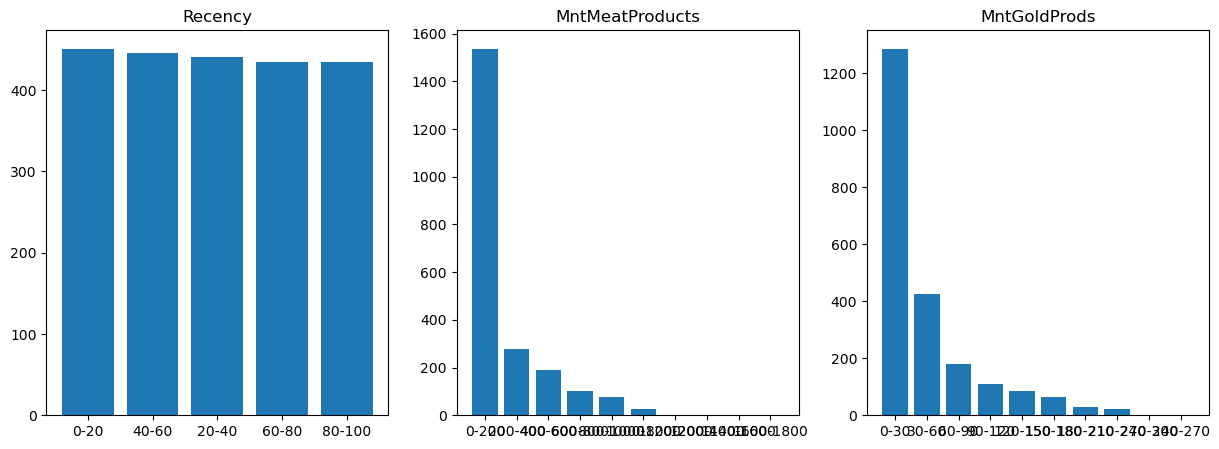

In [12]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 데이터 로드
iris = pd.read_csv('../ifood_df.csv')

# 데이터 전처리
X = iris[['Recency', 'MntMeatProducts', 'MntGoldProds']]

# 범주화
recency_categories = pd.cut(X['Recency'], bins=5, labels=['0-20', '20-40', '40-60', '60-80', '80-100'])
meat_categories = pd.cut(X['MntMeatProducts'], bins=10, labels=['0-200', '200-400', '400-600', '600-800', '800-1000', '1000-1200', '1200-1400', '1400-1600', '1600-1800', '1800-2000'])
gold_categories = pd.cut(X['MntGoldProds'], bins=10, labels= ['0-30', '30-60', '60-90', '90-120', '120-150', '150-180', '180-210', '210-240', '240-270', '270-300'])

# 시각화
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X['Recency'], X['MntMeatProducts'], X['MntGoldProds'], c=[int(i) for i in recency_categories.cat.codes])
ax.set_xlabel('Recency')
ax.set_ylabel('MntMeatProducts')
ax.set_zlabel('MntGoldProds')

# 각 범주별 데이터 수 시각화
recency_counts = recency_categories.value_counts()
meat_counts = meat_categories.value_counts()
gold_counts = gold_categories.value_counts()

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].bar(recency_counts.index.astype(str), recency_counts.values)
ax[0].set_title('Recency')

ax[1].bar(meat_counts.index.astype(str), meat_counts.values)
ax[1].set_title('MntMeatProducts')

ax[2].bar(gold_counts.index.astype(str), gold_counts.values)
ax[2].set_title('MntGoldProds')

plt.show()


#x축: 변수를 나눈 범주(category)
#y축: 해당 범주에 속한 데이터 수(count)

In [3]:
import pandas as pd
import seaborn as sns

<AxesSubplot:xlabel='Recency_cat', ylabel='count'>

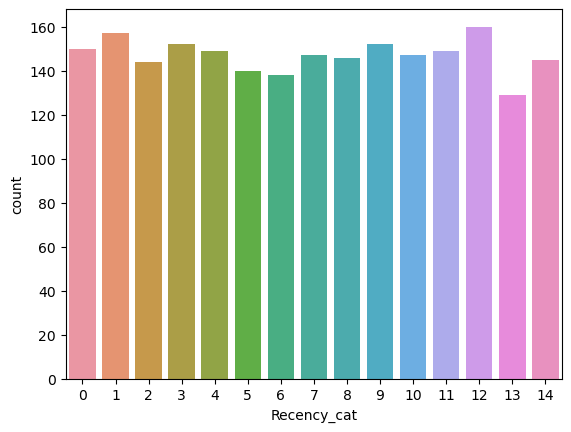

<AxesSubplot:xlabel='MntMeatProducts_cat', ylabel='count'>

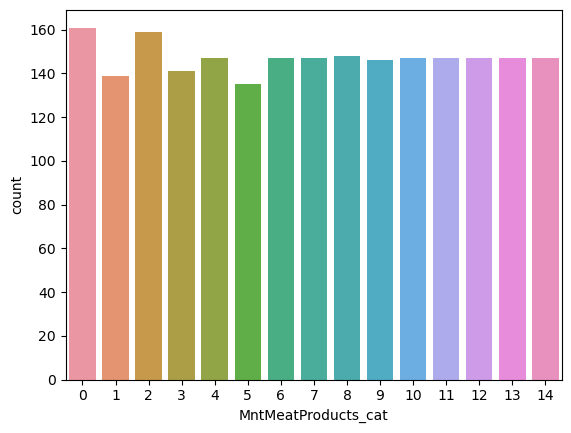

<AxesSubplot:xlabel='MntGoldProds_cat', ylabel='count'>

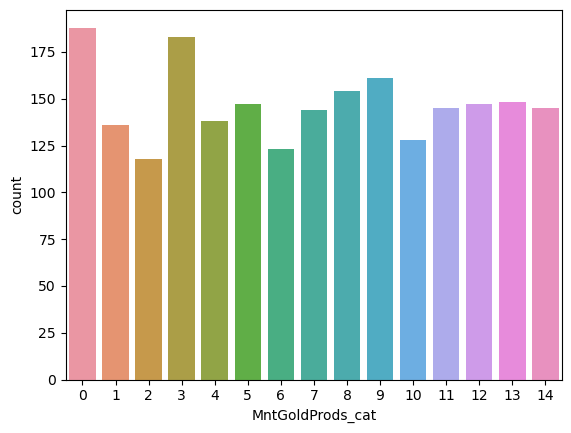

In [13]:


data = pd.read_csv('../ifood_df.csv')


# Recency 변수 범주화
data['Recency_cat'] = pd.qcut(data['Recency'], q=15, labels=False)

# MntMeatProducts 변수 범주화
data['MntMeatProducts_cat'] = pd.qcut(data['MntMeatProducts'], q=15, labels=False)

# MntGoldProds 변수 범주화
data['MntGoldProds_cat'] = pd.qcut(data['MntGoldProds'], q=15, labels=False)



# Recency 변수 시각화
sns.countplot(x="Recency_cat", data=data)
plt.show()

# MntMeatProducts 변수 시각화
sns.countplot(x="MntMeatProducts_cat", data=data)
plt.show()

# MntGoldProds 변수 시각화
sns.countplot(x="MntGoldProds_cat", data=data)
plt.show()



In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


<AxesSubplot:xlabel='Recency', ylabel='Count'>

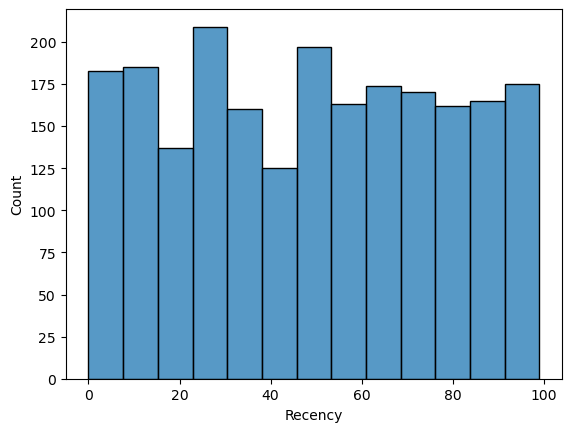

<AxesSubplot:xlabel='MntMeatProducts', ylabel='Count'>

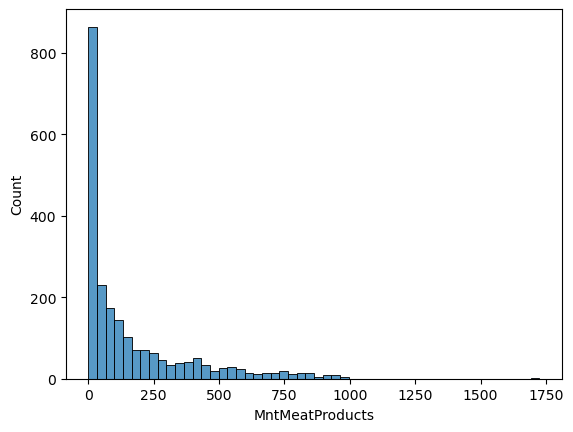

<AxesSubplot:xlabel='MntGoldProds', ylabel='Count'>

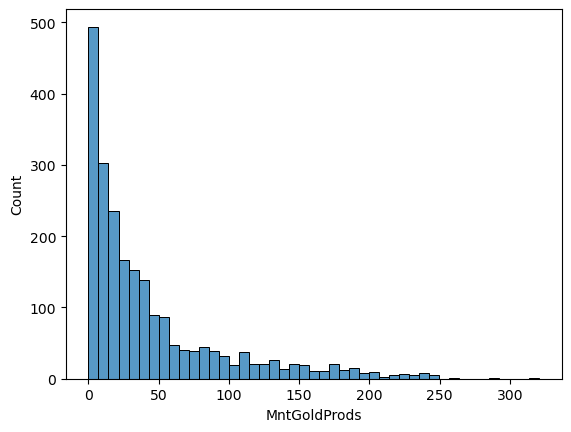

<AxesSubplot:xlabel='Recency_Category', ylabel='Count'>

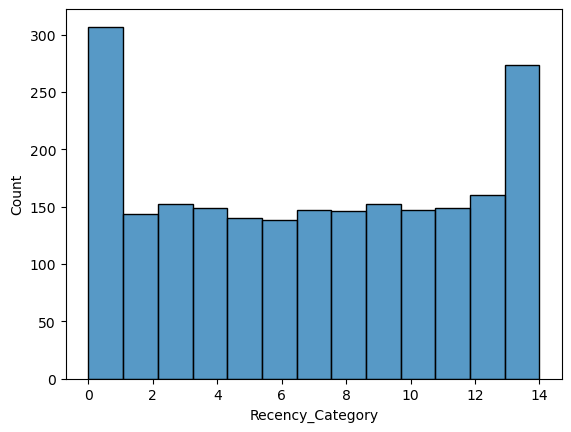

<AxesSubplot:xlabel='MntMeatProducts_Category', ylabel='Count'>

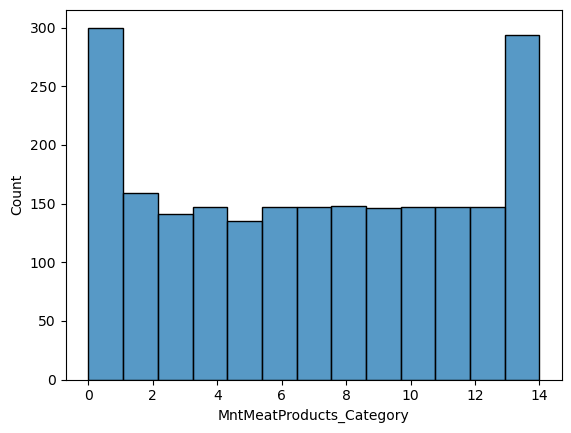

<AxesSubplot:xlabel='MntGoldProds_Category', ylabel='Count'>

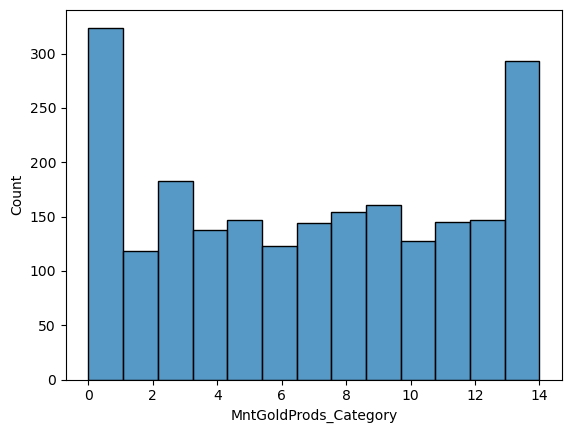

In [14]:
data = pd.read_csv('../ifood_df.csv')

sns.histplot(data=data, x="Recency")
plt.show()

sns.histplot(data=data, x="MntMeatProducts")
plt.show()

sns.histplot(data=data, x="MntGoldProds")
plt.show()

data['Recency_Category'] = pd.qcut(data['Recency'], q=15, labels=False)
data['MntMeatProducts_Category'] = pd.qcut(data['MntMeatProducts'], q=15, labels=False)
data['MntGoldProds_Category'] = pd.qcut(data['MntGoldProds'], q=15, labels=False)

sns.histplot(data=data, x="Recency_Category")
plt.show()

sns.histplot(data=data, x="MntMeatProducts_Category")
plt.show()

sns.histplot(data=data, x="MntGoldProds_Category")
plt.show()



In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 1500x1000 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:xlabel='RecencyRange', ylabel='count'>

Text(0.5, 1.0, 'Recency')

<AxesSubplot:>

<AxesSubplot:xlabel='MeatRange', ylabel='count'>

Text(0.5, 1.0, 'MntMeatProducts')

<AxesSubplot:>

<AxesSubplot:xlabel='GoldRange', ylabel='count'>

Text(0.5, 1.0, 'MntGoldProds')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '0-30'),
  Text(1, 0, '30-60'),
  Text(2, 0, '60-90'),
  Text(3, 0, '90-120'),
  Text(4, 0, '120-150'),
  Text(5, 0, '150-180'),
  Text(6, 0, '180-210'),
  Text(7, 0, '210-240'),
  Text(8, 0, '240-270'),
  Text(9, 0, '270-300')])

Text(0.5, 0.98, 'ifood_df')

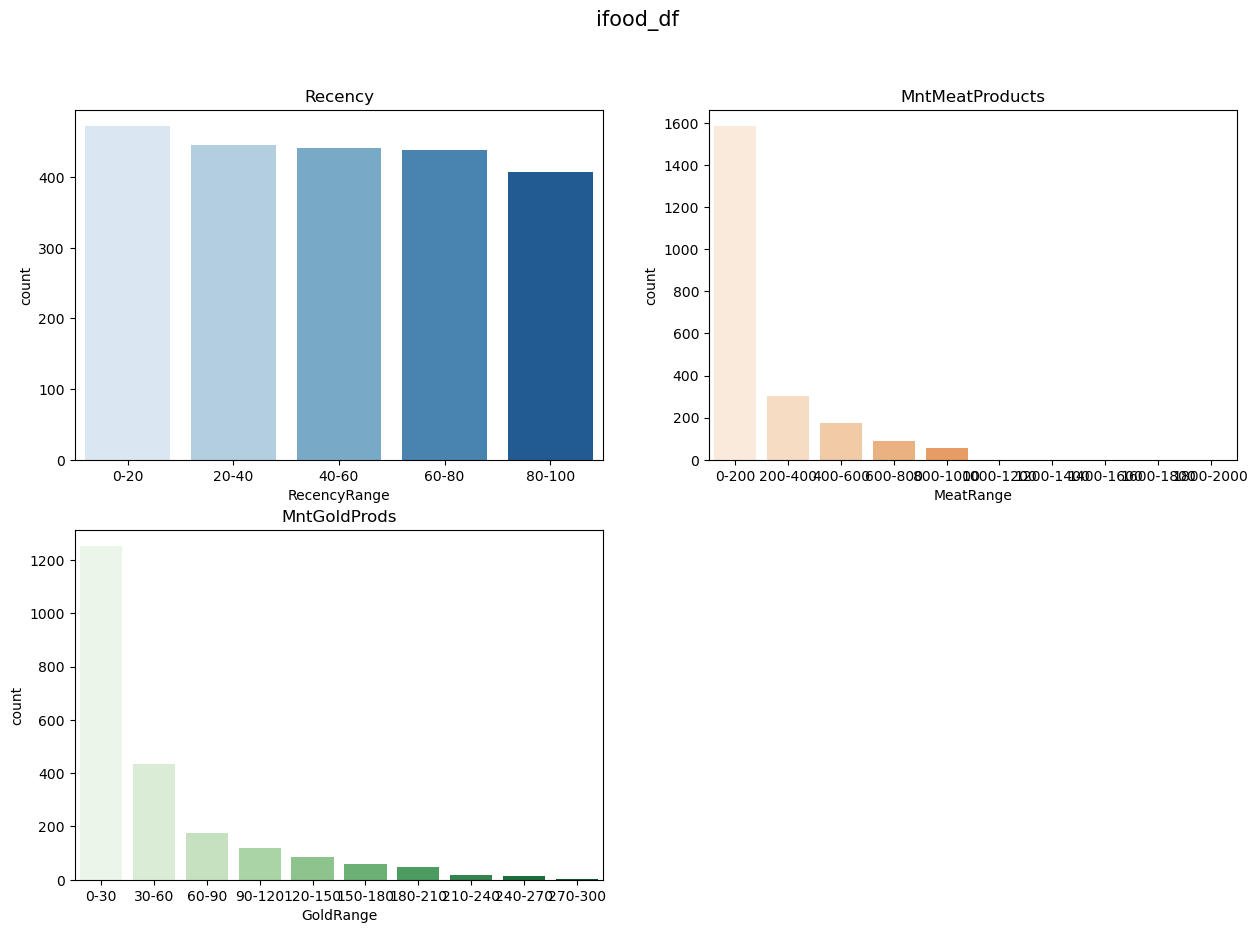

In [16]:
df = pd.read_csv('../ifood_df.csv')


# Recency 변수 범주화
bins_recency = [0, 20, 40, 60, 80, 100]
labels_recency = ['0-20', '20-40', '40-60', '60-80', '80-100']
df['RecencyRange'] = pd.cut(df['Recency'], bins=bins_recency, labels=labels_recency, include_lowest=True)

# MntMeatProducts 변수 범주화
bins_meat = [0, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
labels_meat = ['0-200', '200-400', '400-600', '600-800', '800-1000', '1000-1200', '1200-1400', '1400-1600', '1600-1800', '1800-2000']
df['MeatRange'] = pd.cut(df['MntMeatProducts'], bins=bins_meat, labels=labels_meat, include_lowest=True)

# MntGoldProds 변수 범주화
bins_gold = [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300]
labels_gold = ['0-30', '30-60', '60-90', '90-120', '120-150', '150-180', '180-210', '210-240', '240-270', '270-300']
df['GoldRange'] = pd.cut(df['MntGoldProds'], bins=bins_gold, labels=labels_gold, include_lowest=True)

# 각 범주별 데이터 수 카운트
count_recency = df.groupby('RecencyRange')['Recency'].count()
count_meat = df.groupby('MeatRange')['MntMeatProducts'].count()
count_gold = df.groupby('GoldRange')['MntGoldProds'].count()



# 그래프 크기 조정
plt.figure(figsize=(15, 10))

# Recency 막대 그래프
plt.subplot(2, 2, 1)
sns.countplot(x='RecencyRange', data=df, order=labels_recency, palette='Blues')
plt.title('Recency')

# MntMeatProducts 막대 그래프
plt.subplot(2, 2, 2)
sns.countplot(x='MeatRange', data=df, order=labels_meat, palette='Oranges')
plt.title('MntMeatProducts')

# MntGoldProds 막대 그래프
plt.subplot(2, 2, 3)
sns.countplot(x='GoldRange', data=df, order=labels_gold, palette='Greens')
plt.title('MntGoldProds')

# 각 막대 그래프의 x축 라벨 크기 조정
plt.xticks(fontsize=10)

# 전체 그래프 제목
plt.suptitle('ifood_df', fontsize=15)

# 그래프 표시
plt.show()



